In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 

In [2]:
#read the data
data = np.genfromtxt('seeds.csv', delimiter=',')
seeds = data[1:, :7]
seeds_type = data[1:, 7:]

In [3]:
#TASK 1.a)
#implemented pca from scratch more info : 
#https://www.askpython.com/python/examples/principal-component-analysis
def PCA_impl(X, num_components):
    # mean Centering the data  
    X_meaned = X - np.mean(X , axis = 0)
     
    # calculating the covariance matrix of the mean-centered data.
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Calculating Eigenvalues and Eigenvectors of the covariance matrix
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #sort the eigenvalues/eigenvectors in descending order
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    # select the first n eigenvectors, n is desired dimension
    # of our final reduced data.
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Transform the data
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
    return X_reduced

In [4]:
#TASK 1.b)
#explained variance and explained variance ratio using implemented PCA
pca_impl_seeds = PCA_impl(seeds, 7)

pca_impl_explained_variance = np.var(pca_impl_seeds, axis=0)
pca_impl_explained_variance_ratio = pca_impl_explained_variance / np.sum(pca_impl_explained_variance)

print(pca_impl_explained_variance)
print(pca_impl_explained_variance_ratio)

[1.07970946e+01 2.03805505e+00 7.34206725e-02 1.26838629e-02
 2.74215844e-03 1.57629129e-03 2.90232256e-05]
[8.35326268e-01 1.57675836e-01 5.68025183e-03 9.81297676e-04
 2.12149385e-04 1.21951096e-04 2.24540616e-06]


In [5]:
#explained variance and explained variance ratio using sklearn PCA
pca_sk_seeds = PCA(n_components=7)
pca_sk_seeds.fit(seeds)

pca_sk_explained_variance = pca_sk_seeds.explained_variance_
pca_sk_explained_variance_ratio = pca_sk_seeds.explained_variance_ratio_

print(pca_sk_explained_variance)
print(pca_sk_explained_variance_ratio)

[1.08516254e+01 2.04834826e+00 7.37914840e-02 1.27479228e-02
 2.75600772e-03 1.58425236e-03 2.91698076e-05]
[8.35326268e-01 1.57675836e-01 5.68025183e-03 9.81297676e-04
 2.12149385e-04 1.21951096e-04 2.24540616e-06]


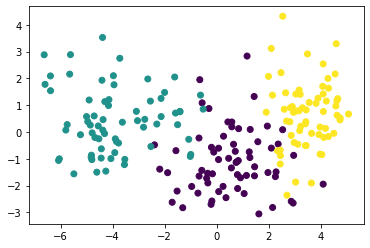

In [6]:
#TASK 1.c)
#scatter plot of the two principal components corresponding to the dimensions with highest variance
plt.scatter(pca_impl_seeds[:,0], pca_impl_seeds[:,1], c = seeds_type[:])

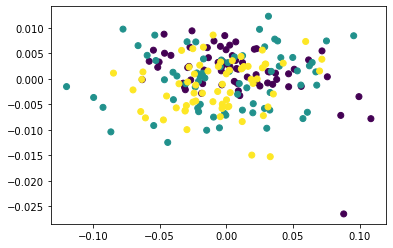

In [7]:
#scatter plot of the two principal components corresponding to the dimensions with lowest variance
plt.scatter(pca_impl_seeds[:,5], pca_impl_seeds[:,6], c = seeds_type[:])